Populating the interactive namespace from numpy and matplotlib


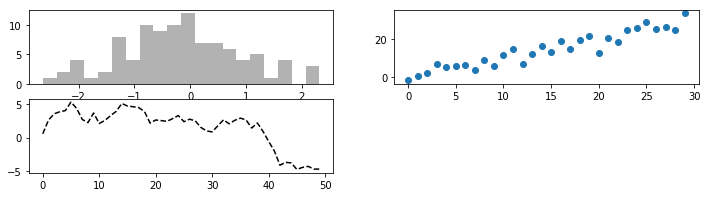

In [4]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
#fig 有一些重要的选项，特别是figsize，规定了图片尺寸
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# 默认在最后一个 subplot 上绘制
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

#fig.add_subplot 返回的对象是AxesSubplot对象
_ = ax1.hist(np.random.randn(100),bins = 20,color = 'k',alpha = 0.3) 
ax2.scatter(np.arange(30),np.arange(30) + 3 * np.random.randn(30))

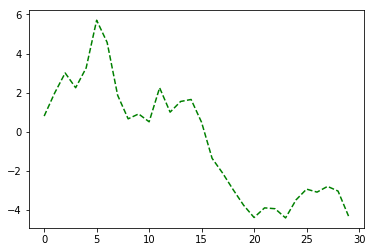

In [5]:
# 绿色虚线
plt.figure()
plt.plot(randn(30).cumsum(), 'g--')

Text(0.5,0,'Stages')

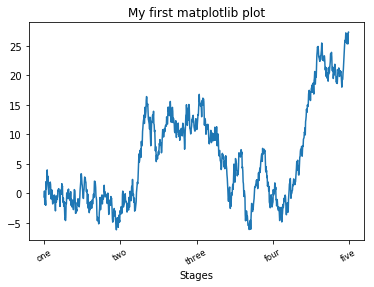

In [6]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

# x 刻度
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

# x 刻度标签
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
# 图表标题
ax.set_title('My first matplotlib plot')

# x 标题
ax.set_xlabel('Stages')

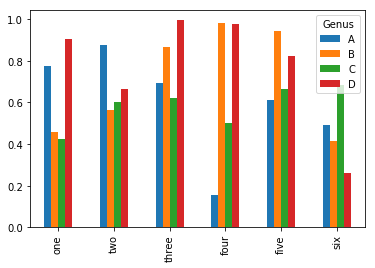

In [7]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [10]:
import pandas as pd
from pandas import Series, DataFrame
df = DataFrame({
    'key1': ['a','a','b','b','a'],
    'key2': ['one','two','one','two','one'],
    'data1': np.random.randn(5),
    'data2': np.random.randn(5)
})

# 根据key1 进行分组，并计算data1列的平均值
# 结果是一个Series
grouped = df['data1'].groupby(df['key1'])
grouped.mean()
#两个维度(key1,key2)上的分组
# 结果是一个Series
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
# 转换成DataFrame
means.unstack()

# 分组键不仅可以是Series
# 比如，可以是数组（需要长度适当）
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

# 可以将列名（字符串、数组或其他对象）用作分组键
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.127114,-0.372463
b,-0.873477,-0.655643


In [12]:
df.groupby(['key1', 'key2']).mean()
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [13]:
# groupby 的结果是 GroupBy 对象。
# 可以进行迭代：
for name, group in df.groupby('key1'):
    print('=================================')
    print(name)
    print('----')
    print(group)

a
----
      data1     data2 key1 key2
0 -0.699307 -0.495279    a  one
1  0.602157  0.612323    a  two
4  0.478493 -1.234433    a  one
b
----
      data1     data2 key1 key2
2 -0.648941 -0.063498    b  one
3 -1.098013 -1.247787    b  two


In [17]:
#函数作为分组键时，会在各个索引值上被调用一次，起返回值作为分组名称。
people.groupby(len).sum()

NameError: name 'people' is not defined

In [18]:
# 数组，列表，字典，Series，函数可以混合分组
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

NameError: name 'people' is not defined

In [15]:
#根据索引级别分组¶
#层次化的索引，可以根据索引级别进行聚合。通过level关键字传入级别编号或名称即可。
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [19]:
import tushare as ts

ts.get_latest_news() #默认获取最近80条新闻数据，只提供新闻类型、链接和标题
ts.get_latest_news(top=5,show_content=True) #显示最新5条新闻，并打印出新闻内容


,classify,title,time,url,content
0,美股,麻生太郎再度重申拒绝与美国进行双边贸易谈判,03-30 17:16,http://finance.sina.com.cn/stock/usstock/c/201...,新浪美股讯 3月30日消息，彭博报道，负责与美国进行经济会谈的日本官员，不希望在钢铝关税问题...
1,证券,3月30日上市公司晚间公告速递,03-30 17:12,http://finance.sina.com.cn/stock/s/2018-03-30/...,新浪财经讯 3月30日消息，周五晚间，两市多家上市公司发布公告消息：\n上海莱士：一季度炒股...
2,美股,亚洲“吞下”全球70%液化天然气,03-30 17:10,http://finance.sina.com.cn/stock/usstock/c/201...,新浪美股讯 3月30日消息 日经中文网报道，亚洲的液化天然气进口国数量10年翻了一番。引人注...
3,证券,一汽轿车：去年盈利2.81亿元 同比扭亏为盈,03-30 17:10,http://finance.sina.com.cn/stock/s/2018-03-30/...,新浪财经讯，一汽轿车（000800）3月30日晚间披露2017年报，实现营收279.02亿元...
4,证券,上海莱士：炒股亏损8.9亿 一季报预亏7.2亿—6.5…,03-30 17:00,http://finance.sina.com.cn/stock/s/2018-03-30/...,新浪财经讯 上海莱士发布公告称，一季报预亏7.2亿元~6.5亿元，去年同期盈利2.2亿，20...
